<a href="https://www.kaggle.com/code/prasadposture121/twitter-sentiment-analysis-using-dtc?scriptVersionId=136014284" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Twitter Sentiment Analysis using NLTK and DTC
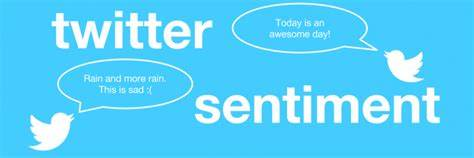

# Introduction
This is a beginner friendly notebook for sentiment analysis using twitters data which contains information about the relevant organizations, tweets and the labels. We will use Natural Language Toolkit (NLTK) and DTC (DesicionTreeClassifier) to predict whether the tweet is positive, negative or neutral. We will train a model later, we will use in a web application.

# Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

# Loading the data
We will combine both training and validation data here and later seperate them randomly using train_test_split function.

In [2]:
df1=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv', header=None)
df1.columns=['id','information','label','tweet']
df1.head()

,id,information,label,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
df2 = pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv',header=None)
df2.columns=['id','information','label','tweet']
df2.head()

,id,information,label,tweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
df = pd.concat([df1,df2],axis=0)
df.head()

,id,information,label,tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Data Preprocessing

In [5]:
# Reassigning the data type
df['tweet'] = df['tweet'].astype(str)

In [6]:
# Counting the unique values from the table
df['label'].value_counts()

Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: label, dtype: int64

In [7]:
# Removing Irrelevant Tweets for better accuracy
df=df[df['label']!='Irrelevant']
df.reset_index(inplace=True)

# Replace categorical values with respective numbers
df['label']=df['label'].replace(['Negative','Neutral','Positive'],[-1,0,1])
df['label'].unique()

array([ 1,  0, -1])

In [8]:
# Removing any other patterns
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()

,index,id,information,label,tweet,clean_tweet
0,0,2401,Borderlands,1,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,1,2401,Borderlands,1,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,2,2401,Borderlands,1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,3,2401,Borderlands,1,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [9]:
# Removing Special Characters
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,index,id,information,label,tweet,clean_tweet
0,0,2401,Borderlands,1,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,1,2401,Borderlands,1,I am coming to the borders and I will kill you...,I am coming to the borders and I will kill you...
2,2,2401,Borderlands,1,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,3,2401,Borderlands,1,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder ...


In [10]:
# Removing the shorter words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
df.head()

,index,id,information,label,tweet,clean_tweet
0,0,2401,Borderlands,1,im getting on borderlands and i will murder yo...,getting borderlands will murder
1,1,2401,Borderlands,1,I am coming to the borders and I will kill you...,coming borders will kill
2,2,2401,Borderlands,1,im getting on borderlands and i will kill you ...,getting borderlands will kill
3,3,2401,Borderlands,1,im coming on borderlands and i will murder you...,coming borderlands will murder
4,4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...,getting borderlands will murder


In [11]:
# Converting each tweet into list of words
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet

0                     [getting, borderlands, will, murder]
1                            [coming, borders, will, kill]
2                       [getting, borderlands, will, kill]
3                      [coming, borderlands, will, murder]
4                     [getting, borderlands, will, murder]
                               ...                        
62515    [Please, explain, this, possible, they, compan...
62516    [Good, Sony, much, want, what, going, right, m...
62517    [Today, sucked, time, drink, wine, play, borde...
62518    [Bought, fraction, Microsoft, today, Small, wins]
62519    [Johnson, Johnson, stop, selling, talc, baby, ...
Name: clean_tweet, Length: 62520, dtype: object

In [12]:
# Keeping the repeated words or part of words from each tweet
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet

0                          [get, borderland, will, murder]
1                               [come, border, will, kill]
2                            [get, borderland, will, kill]
3                         [come, borderland, will, murder]
4                          [get, borderland, will, murder]
                               ...                        
62515    [pleas, explain, thi, possibl, they, compani, ...
62516    [good, soni, much, want, what, go, right, much...
62517    [today, suck, time, drink, wine, play, borderl...
62518     [bought, fraction, microsoft, today, small, win]
62519    [johnson, johnson, stop, sell, talc, babi, pow...
Name: clean_tweet, Length: 62520, dtype: object

In [13]:
# Joining the common words back to the sentences and appending them to dataframe
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet
df.head()

,index,id,information,label,tweet,clean_tweet
0,0,2401,Borderlands,1,im getting on borderlands and i will murder yo...,get borderland will murder
1,1,2401,Borderlands,1,I am coming to the borders and I will kill you...,come border will kill
2,2,2401,Borderlands,1,im getting on borderlands and i will kill you ...,get borderland will kill
3,3,2401,Borderlands,1,im coming on borderlands and i will murder you...,come borderland will murder
4,4,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...,get borderland will murder


# BOW: Bag of Words
[Read More](https://www.geeksforgeeks.org/bag-of-words-bow-model-in-nlp/)

In [14]:
# Bag of Words: Cause Computer understands numbers not English
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words="english")
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

# Predictive Modeling

In [15]:
# Train, Test and Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [16]:
# Defining a function to measure the accuracy
def accuracy(pred, y_test):
    l=0
    for i,j in zip(pred, y_test):
        if i==j:
            l=l+1
    return l/len(pred)

In [17]:
# Fitting the model on train data
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# Making predictions on the seen data, Checking for overfitting step-I
preds=model.predict(x_train)
accuracy(preds,y_train)

0.9329281296651738

In [18]:
# Making Predictions on Test, checking for overfitting step-II
pred = model.predict(x_test)
accuracy(pred, y_test)

0.7948176583493282

### Hyper-parameter Tuning
We will try to generalize the model so that it gives better accuaracy on testing data (even if comes at the cost of lesser acccuracy on training data).

In [19]:
# Max depth is an important parameter when it comes to increasing the accuracy
model.tree_.max_depth

715

In [20]:
# Finding appropriate values for parameter
# Takes a lot of time
parameter = []
test_accuracy = []
for i in range(1,720):
    parameter.append(i)
    model = DecisionTreeClassifier(random_state=42, max_depth=i)
    model.fit(x_train, y_train)
    pred_test = model.predict(x_test)
    test_acc = accuracy(y_test, pred_test)
    test_accuracy.append(test_acc)
best_param=parameter[test_accuracy.index(max(test_accuracy))]
print('best_param: ',best_param)

best_param:  686


In [21]:
# Training with best paramter
model = DecisionTreeClassifier(random_state=42, max_depth=best_param)
model.fit(x_train, y_train)

# Making Predictions on Test Data
pred = model.predict(x_test)
accuracy(y_test, pred)

0.7978886756238004

# Saving the Model and Objects

In [22]:
import joblib as jb
tsa = {
    'model':model,
    'bow_vectorizer': bow_vectorizer
}
jb.dump(tsa, 'tsa.joblib')

['tsa.joblib']

# Summarizing the Processes

In [23]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import joblib as jb
import warnings
warnings.filterwarnings("ignore")
tsa = jb.load('tsa.joblib')
model = tsa['model']
bow_vectorizer = tsa['bow_vectorizer']
#input_tweet= input("Enter the tweet here: ") uncomment this before using, comment the below one
input_tweet="India lifts the world cup after 25 years, as the celebration started in the dressing room. Everybody enjoyed that night."
df = pd.DataFrame([{'tweet':input_tweet}])
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet
bow = bow_vectorizer.transform(df['clean_tweet'])
pred = model.predict(bow)
if pred==1:
    print("Positive Tweet")
elif pred==0:
    print("Neutral Tweet")
elif pred==-1:
    print("Negative Tweet")

Positive Tweet


You can use the same code for the another dataset from analytics vidya for making predictions with slight modifications while loading the data (remove header = None and dont rename the columns).

Here is the link of the web application which uses summarized code and trained model to make predictions on the data: [Web App](https://twitter-sentiment-analysis.streamlit.app/)

The End